<a href="https://colab.research.google.com/github/Emmanuel2000x/Statistics-ML-G8/blob/main/Clasificacion_validacion_y_metricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='dark'>**Clasificación: Validación de modelos y métricas de evaluación**</h1>

### Proyecto

Una empresa de financiamiento de automóviles está atravesando una situación complicada, con una alta demanda para una flota reducida de vehículos y un alto número de morosos, lo que está generando grandes pérdidas para la empresa.

Nosotros fuimos contratados para buscar mejoras en la identificación de morosos. El análisis de los clientes actualmente se realiza de forma manual, cliente por cliente, lo que consume mucho tiempo y, aun así, la detección de morosos es muy imprecisa.

Nuestra tarea es utilizar los datos proporcionados por la empresa para **clasificar** a los clientes en cumplidores y morosos.

## <font color='dark'>Clasificando los datos</h1>

### Creando un modelo inicial

In [34]:
import pandas as pd


In [35]:
DF = pd.read_csv('/content/prestacar.csv')

In [36]:
DF.head()

,ingresos_cliente,anualidad_prestamo,años_casa_propia,telefono_trab,evaluacion_ciudad,score_1,score_2,score_3,score_social,cambio_telefono,moroso
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [37]:
X = DF.drop(columns='moroso')
y = DF.moroso

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
modelo = DecisionTreeClassifier()
modelo.fit(X,y)

DecisionTreeClassifier()

In [40]:
modelo.score(X,y)

1.0

### Validando el modelo

Evaluar el modelo con los mismos datos utilizados en el entrenamiento no es recomendable. Es necesario que la evaluación se realice con datos independientes.  

Evaluar el modelo con los propios datos de entrenamiento sería equivalente a entregar un examen con las preguntas y las respuestas a una persona y, al momento de evaluarla nuevamente, entregarle un examen con las mismas preguntas y opciones. Se espera que esa persona obtenga un buen resultado, ya que ya ha visto las respuestas y ha memorizado el resultado. Esto es diferente de haber aprendido la materia a partir de ese examen y luego presentar una prueba con contenido similar y obtener un resultado positivo.  

Con el objetivo de verificar la capacidad de generalización de un modelo, debemos dividir el conjunto de datos en tres partes: datos de entrenamiento, validación y prueba.  

- El **conjunto de entrenamiento** se utiliza para entrenar los modelos. A partir de este conjunto, los modelos identifican patrones en los datos.  

- El **conjunto de validación** se emplea para evaluar el desempeño de diferentes modelos con datos nuevos que no fueron utilizados en el entrenamiento.  

- El **conjunto de prueba** se mantiene separado desde el inicio para simular datos del mundo real. No se utiliza en ninguna etapa del entrenamiento ni de la validación, sirviendo como una estimación de la capacidad del modelo elegido para generalizar y predecir nuevos datos.

<a href="https://ibb.co/9H2Z1HZ5"><img src="https://i.ibb.co/0yZs6ysb/datos-train-test.png" alt="datos-train-test" border="0"></a>

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X, X_test, y, y_test = train_test_split(X,y, test_size=0.15, random_state=10, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=10, stratify=y)

In [43]:
modelo_tree = DecisionTreeClassifier()
modelo_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
print(f'Exactitud del modelo con el entrenamiento: {modelo_tree.score(X_train,y_train)}')
print(f'Exactitud del modelo con la validacion: {modelo_tree.score(X_val,y_val)}')

Exactitud del modelo con el entrenamiento: 1.0
Exactitud del modelo con la validacion: 0.8466161484191272


In [45]:
modelo_tree = DecisionTreeClassifier(max_depth=7)
modelo_tree.fit(X_train,y_train)
print(f'Exactitud del modelo con el entrenamiento: {modelo_tree.score(X_train,y_train)}')
print(f'Exactitud del modelo con la validacion: {modelo_tree.score(X_val,y_val)}')

Exactitud del modelo con el entrenamiento: 0.9148083623693379
Exactitud del modelo con la validacion: 0.9108962633916906


### Evaluando el modelo

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
y_previsto = modelo_tree.predict(X_test)
matriz_confusion = confusion_matrix(y_true = y_test, y_pred= y_previsto)
print(matriz_confusion)

[[7368   29]
 [ 699    8]]


In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

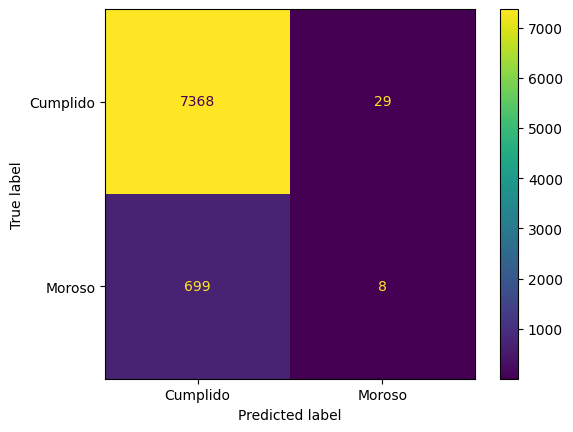

In [49]:
visualizacion = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion, display_labels=['Cumplido', 'Moroso'])
visualizacion.plot();

In [50]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=10)
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [51]:
print(f'Exactitud del modelo RFC con el entrenamiento: {RFC.score(X_train,y_train)}')
print(f'Exactitud del modelo RFC con la validacion: {RFC.score(X_val,y_val)}')

Exactitud del modelo RFC con el entrenamiento: 0.9835365853658536
Exactitud del modelo RFC con la validacion: 0.9128124727811167


In [52]:
y_RFC = RFC.predict(X_val)
matriz_confusion = confusion_matrix(y_true = y_val, y_pred = y_RFC)
print(matriz_confusion)

[[10424    55]
 [  946    56]]


## <font color='dark'>Métricas de evaluación</h1>

### Exactitud, precisión y recall (sensibilidad).

<a href="https://ibb.co/351SbY7t"><img src="https://i.ibb.co/wZypqrRD/matriz-confusion.png" alt="matriz-confusion" border="0"></a>

<a href="https://imgbb.com/"><img src="https://i.ibb.co/6Jp6rKyC/Captura-de-tela-2025-03-22-120744.png" alt="Captura-de-tela-2025-03-22-120744" border="0"></a>

### Curva ROC

In [53]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/dariyasydykova/open_projects/master/ROC_animation/animations/cutoff.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)




### Curva de  precisión x sensibilidad

In [54]:
Image(url='https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif')

Fuente: [paulvanderlaken.com](https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/)


### Informe de métricas

## <font color='dark'> Validación cruzada</h1>

### Usando KFold

La validación del modelo de clasificación a partir de la separación de los datos en conjuntos de entrenamiento y validación hace que el resultado dependa en gran medida de esta división. Puede suceder que, de forma aleatoria, el patrón de los datos de validación sea diferente al de los datos de entrenamiento, lo que podría llevar a obtener un resultado mucho mejor o mucho peor que la realidad simplemente por suerte o mala suerte.  

Teniendo esto en cuenta, es posible utilizar la **validación cruzada**, una estrategia más consistente y ampliamente utilizada en proyectos de *machine learning*.  

En la validación cruzada, en lugar de separar los datos en entrenamiento y validación una sola vez, se dividen en varias partes de igual tamaño. En cada una de estas divisiones, se usa una parte para validación y todas las demás para entrenamiento. Este proceso se repite hasta que todas las partes hayan sido utilizadas tanto para validación como para entrenamiento.  

Se generará un modelo para cada una de estas divisiones y la evaluación del desempeño se realizará promediando la métrica de cada modelo. Esto elimina la dependencia de la separación de los datos, ya que hay una mayor variación en la selección de los mismos y se obtiene un valor medio.  

Generalmente, se utilizan 5 o 10 partes. Un número mayor no suele ser necesario, ya que implica un procesamiento más costoso, y valores menores ya ayudan a mitigar el problema de la selección de los datos.

<a href="https://ibb.co/KcBtshJR"><img src="https://i.ibb.co/nq4X1mFZ/train-y-validacion.png" alt="train-y-validacion" border="0"></a>

### Validación cruzada con sensibilidad

### Estratificando los datos

## <font color='dark'>Balanceo de los datos</h1>

### Oversampling

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html#id1

### Pipeline para validación

### Undersampling

https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.NearMiss.html

### Probando el modelo

# **Desafio** Diabetes

## 1 - Para la construcción de un modelo de machine learning se necesitan datos. Como tarea inicial, realiza la lectura de la base de datos de diabetes y divide los datos en variables explicativas y variable objetivo (x e y). La variable objetivo es la columna que quieres clasificar, que contiene la información de si el paciente tiene o no diabetes. Las variables explicativas son todas las columnas excepto la de diabetes. La separación de los datos se puede hacer con la selección de columnas con pandas.

In [55]:
DF_d = pd.read_csv('diabetes.csv')

In [56]:
DF_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   glicemia                  394 non-null    int64  
 1   presion_sanguinea         394 non-null    int64  
 2   grasa_subcutanea_triceps  394 non-null    int64  
 3   insulina                  394 non-null    float64
 4   imc                       394 non-null    float64
 5   diabetes                  394 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 18.6 KB


In [57]:
X_d = DF_d.drop(columns = 'diabetes')
y_d = DF_d.diabetes

## 2 - Una etapa muy importante en proyectos de clasificación es la validación de los modelos, para identificar si hay una generalización del modelo para datos nuevos. Realiza la división de los datos entre entrenamiento, validación y prueba. Utiliza el 5% de los datos para prueba y con el resto, deja el 25% para validación. En el momento de la separación, usa el parámetro stratify a partir de la variable objetivo para mantener la proporción de los datos.

In [58]:
#from sklearn.model_selection import train_test_split
X_d, X_d_test, y_d, y_d_test = train_test_split(X_d, y_d, stratify = y_d, test_size = 0.05, random_state = 5)
X_d_train, X_d_val, y_d_train, y_d_val = train_test_split(X_d, y_d, stratify = y_d, random_state = 5)

## 3 - La etapa de modelado de datos consiste en utilizar un algoritmo capaz de identificar patrones en los datos y clasificar los valores. A partir del modelo es posible extraer una tasa de acierto para entender su desempeño. Crea 2 modelos utilizando los algoritmos DecisionTreeClassifier y RandomForestClassifier y evalúa la precisión de entrenamiento y prueba, eligiendo el valor 3 para el parámetro max_depth del algoritmo **DecisionTreeClassifier** y el valor 2 para el max_depth del algoritmo **RandomForestClassifier**, para que los modelos no se especialicen demasiado en el patrón de los datos de entrenamiento.

In [59]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.tree import DecisionTreeClassifier
modelo_d_DTC = DecisionTreeClassifier(max_depth=3)
modelo_d_RFC = RandomForestClassifier(max_depth=2)

In [60]:
#Arbol de clasificacion
modelo_d_DTC.fit(X_d_train,y_d_train)
print(f'Score Decision Tree en Train: {modelo_d_DTC.score(X_d_train,y_d_train)}')
print(f'Score Decision Tree en Val: {modelo_d_DTC.score(X_d_val,y_d_val)}')

Score Decision Tree en Train: 0.7571428571428571
Score Decision Tree en Val: 0.776595744680851


In [61]:
#Random Forest
modelo_d_RFC.fit(X_d_train,y_d_train)
print(f'Score R_Forest Tree en Train: {modelo_d_RFC.score(X_d_train,y_d_train)}')
print(f'Score R_Forest Tree en Val: {modelo_d_RFC.score(X_d_val,y_d_val)}')

Score R_Forest Tree en Train: 0.7321428571428571
Score R_Forest Tree en Val: 0.7021276595744681


## 4 - La tasa de acierto generalmente no proporciona información suficiente para entender el comportamiento del modelo. La matriz de confusión es una herramienta más completa, capaz de proporcionar los aciertos y errores del modelo para cada clase. Construye una matriz de confusión para cada uno de los modelos para evaluar el desempeño de la predicción. Para construir la matriz, usa el método predict para generar las predicciones de los valores y comparar con los valores reales de la base de datos.



In [62]:
#from sklearn.metrics import ConfusionMatrixDisplay

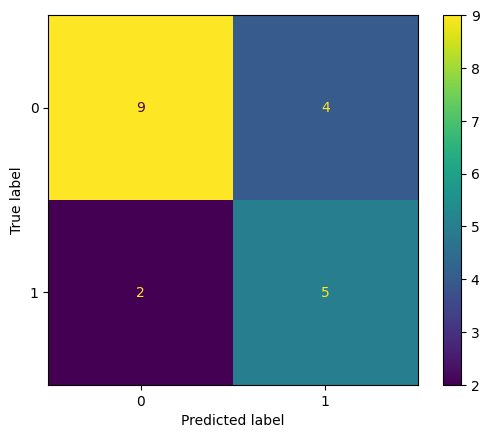

In [63]:
prediccion_Tree = modelo_d_DTC.predict(X_d_test)
ConfusionMatrixDisplay.from_predictions(y_d_test, prediccion_Tree);

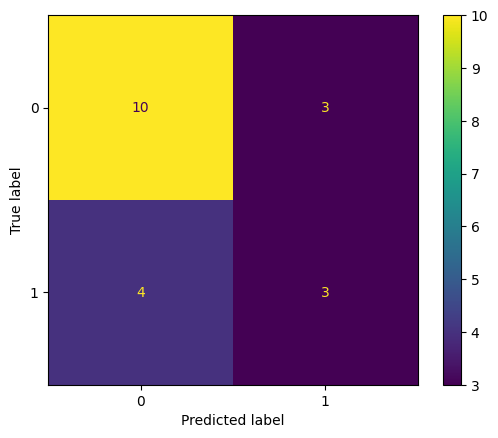

In [64]:
prediccion_RForest = modelo_d_RFC.predict(X_d_test)
ConfusionMatrixDisplay.from_predictions(y_d_test, prediccion_RForest);